**Importing libraries**

In [51]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**DataFrame**

In [52]:
# Reading and encoding dataframe
attacks = pd.read_csv('/Users/victor/maria/ironhack_labs/attacks.csv', encoding='cp1252')
attacks_df = attacks.copy()

In [53]:
# Getting some basic info
attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [54]:
# General cleaning
attacks_df.dropna(axis = 0, how = 'all', inplace = True)
attacks_df.columns = attacks_df.columns.str.capitalize().str.strip()
attacks_df = attacks_df.drop(attacks_df[attacks_df['Case number'] == '0'].index)
attacks_df = attacks_df.drop(attacks_df[attacks_df['Case number'] == 'xx'].index)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 24)

In [55]:
# New valid info
attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (y/n)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [56]:
# Checking if there is any valid ID
print(attacks_df['Case number.1'].is_unique)
print(attacks_df['Original order'].is_unique)
print(attacks_df['Href'].is_unique)
print(attacks_df['Pdf'].is_unique)

False
False
False
False


In [57]:
# Checking there are not duplicated rows, before setting a new ID
duplicateRows = attacks_df[attacks_df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [Case number, Date, Year, Type, Country, Area, Location, Activity, Name, Sex, Age, Injury, Fatal (y/n), Time, Species, Investigator or source, Pdf, Href formula, Href, Case number.1, Case number.2, Original order, Unnamed: 22, Unnamed: 23]
Index: []


In [58]:
attacks_df = attacks_df.drop(columns = ['Case number', 'Area', 'Name', 'Time', 'Investigator or source','Pdf','Href formula', 'Href', 'Case number.2', 'Original order', 'Unnamed: 22', 'Unnamed: 23'])
# Case number: is not unique, and doesn't give us relevant information
# Area: is a categorical variable with many different options, we will use Country instead
# Name: doesn't give us relevant info about the attack
# Time: is an incomplete variable
# Invesigation or source: doesn't give us relevant information about the attack
# Pdf: doesn't give us relevant info
# Href formula: doesn't give us relevant info
# Href: doesn't give us relevant info
# Case number.2: repeated column
# Original order: could be used to get the date easier, as well as Case Number, but we will use Date and Year instead
# Unnamed: 22: empty column
# Unnamed: 23: empty column

In [60]:
# Setting a new ID
attacks_df.index = [x for x in range(1, len(attacks_df.values)+1)]
attacks_df.index.name = 'Attacks_ID'

In [61]:
attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 1 to 6302
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6302 non-null   object 
 1   Year           6300 non-null   float64
 2   Type           6298 non-null   object 
 3   Country        6252 non-null   object 
 4   Location       5762 non-null   object 
 5   Activity       5758 non-null   object 
 6   Sex            5737 non-null   object 
 7   Age            3471 non-null   object 
 8   Injury         6274 non-null   object 
 9   Fatal (y/n)    5763 non-null   object 
 10  Species        3464 non-null   object 
 11  Case number.1  6302 non-null   object 
dtypes: float64(1), object(11)
memory usage: 640.0+ KB


# Demographics

In [62]:
attacks_df[['Sex','Age']]

,Sex,Age
Attacks_ID,,
1,F,57
2,F,11
3,M,48
4,M,NaN
5,M,NaN
...,...,...
6298,M,NaN
6299,M,NaN
6300,M,NaN


## Age

In [63]:
attacks_df.Age.describe()

count     3471
unique     157
top         17
freq       154
Name: Age, dtype: object

In [64]:
attacks_df.Age.value_counts(dropna=False)

NaN         2831
17           154
18           150
19           142
20           141
            ... 
87             1
18 or 20       1
33 & 26        1
? & 19         1
9 months       1
Name: Age, Length: 158, dtype: int64

We have 640 valid data in Age, let's try to rise it a little bit

In [22]:
attacks_df.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

**If we assume:**
- Teenagers are between 13 and 19; so the mean will be *16*
- Youngs are from 20 to 30; so the mean will be *25*
- Adults are from 31 to 65; so the mean is *48*
- Elderly are from 66 to 100+; the mean is around *88*

In [65]:
# Cleaning Age column in order to get valuable data
attacks_df['Age'] = attacks_df['Age'].astype(str)
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*een.*$)', '16')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*oun.*$)', '25')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*dul.*$)', '48')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*lderl.*$)', '88')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*middle-a.*$)', '37')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*onth.*$)', '1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)s.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\s$', 'NaN')
attacks_df['Age'] = attacks_df.Age.str.replace('nan', 'NaN')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\s&.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\sor.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\sto.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\sto.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\s(\d\d)', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^(\d\d).*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\D*(\d\d)', r'\1')
attacks_df['Age'].replace(('\xa0', 'NaN'), inplace = True)
attacks_df['Age'] = attacks_df.Age.str.replace(r'(\d)\s\s\s.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\s\s.*', r'NaN')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\D{1,}$', r'NaN')
attacks_df['Age'].replace(('2½', '25'), inplace = True)
attacks_df['Age'].replace(('6½', '65'), inplace = True)
attacks_df['Age'].fillna('NaN') 


<ipython-input-65-3d9bd2cc2b39>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*een.*$)', '16')
<ipython-input-65-3d9bd2cc2b39>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*oun.*$)', '25')
<ipython-input-65-3d9bd2cc2b39>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*dul.*$)', '48')
<ipython-input-65-3d9bd2cc2b39>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*lderl.*$)', '88')
<ipython-input-65-3d9bd2cc2b39>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*middle-a.*$)',

Attacks_ID
1       57
2       11
3       48
4       48
5       48
        ..
6298    16
6299    16
6300    16
6301    16
6302    15
Name: Age, Length: 6302, dtype: object

In [66]:
attacks_df.Age.unique()

array(['57', '11', '48', '18', '52', '15', '12', '32', '10', '21', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '69', '38',
       '55', '35', '46', '45', '14', '40', '28', '20', '24', '26', '49',
       '22', '7', '31', '17', '13', '42', '3', '8', '50', '16', '82',
       '73', '68', '51', '39', '58', '47', '61', '36', '66', '43', '9',
       '72', '59', '6', '27', '64', '23', '71', '44', '62', '63', '70',
       '1', '53', '77', '74', '5', '86', '84', 'NaN', '75', '87', '67',
       '88', '81', '78'], dtype=object)

In [67]:
attacks_df['Age'].describe()

count     6302
unique      80
top         17
freq       360
Name: Age, dtype: object

In [68]:
attacks_df.Age.value_counts(dropna=False)

17    360
16    330
18    329
19    309
15    276
     ... 
67      1
88      1
86      1
81      1
84      1
Name: Age, Length: 80, dtype: int64

In [69]:
attacks_df.Age.value_counts(normalize=True).head(15)

17    0.057125
16    0.052364
18    0.052206
19    0.049032
15    0.043796
20    0.043637
22    0.039194
21    0.037607
13    0.033481
24    0.028880
14    0.028404
30    0.026817
26    0.025389
28    0.024595
27    0.024595
Name: Age, dtype: float64

In [70]:
# Statistics
attacks_df['Age'] = pd.to_numeric(attacks_df['Age'], errors = 'coerce')
print('Age mean is: ', attacks_df.Age.mean())
print('Age median is: ', attacks_df.Age.median())
print('Age mode is: ', attacks_df.Age.mode())

Age mean is:  26.16199426568971
Age median is:  22.0
Age mode is:  0    17.0
dtype: float64


## Sex

In [72]:
attacks_df.Sex.describe()

count     5737
unique       6
top          M
freq      5094
Name: Sex, dtype: object

In [73]:
attacks_df.Sex.value_counts(dropna=False)

M      5094
F       637
NaN     565
N         2
M         2
lli       1
.         1
Name: Sex, dtype: int64

In [74]:
attacks_df.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [75]:
attacks_df['Sex'].replace(('lli', 'NaN'), inplace = True)
attacks_df['Sex'].replace(('N', 'NaN'), inplace = True)
attacks_df['Sex'].replace(('.', 'NaN'), inplace = True)
attacks_df['Sex'] = attacks_df.Sex.str.replace(r'^(M)\s$', r'\1')
attacks_df['Sex'].fillna('NaN') 

<ipython-input-75-c8966c2c3475>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Sex'] = attacks_df.Sex.str.replace(r'^(M)\s$', r'\1')


Attacks_ID
1       F
2       F
3       M
4       M
5       M
       ..
6298    M
6299    M
6300    M
6301    M
6302    M
Name: Sex, Length: 6302, dtype: object

In [76]:
attacks_df.Sex.unique()

array(['F', 'M', nan], dtype=object)

In [77]:
attacks_df.Sex.value_counts(normalize=True)

M    0.888773
F    0.111227
Name: Sex, dtype: float64

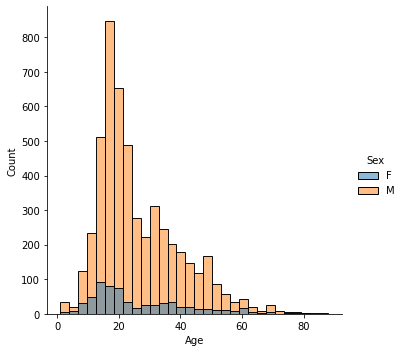

In [78]:
ages = attacks_df.Age.sort_values()
sns.displot(x = ages, 
            hue = attacks_df.Sex,
           bins = 30);

> Top model 1: __Demographics__

>_Procedure_
>- General dataframe cleaning (empty rows, non-valuable columns, rename columns, setting an autoincremental ID)
>    - Finally we have 6302 informative cases to work with
>- Cleaning Age series (from 3471 filled rows distribution in 157 unique values, to non-empty cells, normalizing the values to 80 unique values)
>- Cleaning Sex series (from 5737 filled rows distributed in 6 unique values, to non-empty cells in two unique values)
 
>_Conclusions_
>- Most victicms of shark attacks were predominantly teenagers or youngs, around to 22 y.o. in both sexs.
>- Even if it seems that men are most likely to be attacked by sharks (88%), it's important to keep in mind that with this data it is not possible to know if, for example, women come less close to the beach or if they are more cautious


# Space-time Statistics

In [79]:
attacks_df[['Date','Location', 'Country']]

,Date,Location,Country
Attacks_ID,,,
1,25-Jun-2018,"Oceanside, San Diego County",USA
2,18-Jun-2018,"St. Simon Island, Glynn County",USA
3,09-Jun-2018,"Habush, Oahu",USA
4,08-Jun-2018,Arrawarra Headland,AUSTRALIA
5,04-Jun-2018,La Ticla,MEXICO
...,...,...,...
6298,Before 1903,Roebuck Bay,AUSTRALIA
6299,Before 1903,NaN,AUSTRALIA
6300,1900-1905,Ocracoke Inlet,USA


## Date

In [80]:
attacks_df.Date.describe()

count     6302
unique    5433
top       1957
freq        11
Name: Date, dtype: object

In [81]:
attacks_df.Date.value_counts(dropna=False)

1957                    11
1942                     9
1956                     8
1958                     7
1941                     7
                        ..
09-Dec-1954              1
13-Jan-1976              1
13-Oct-1878              1
Reported 05-Mar-2007     1
18-Jun-1961              1
Name: Date, Length: 5433, dtype: int64

In [82]:
attacks_df.Date.sort_values(ascending=False)

Attacks_ID
6272       World War II
6273       World War II
4803      Woirld War II
3445        Winter 1969
4722        Winter 1942
             ...       
652         22-Jul-2013
3405        16-Jan-1970
4850        15-Jun-1937
1175        10-Jan-2009
4426     \n1951.12.15.R
Name: Date, Length: 6302, dtype: object

In [83]:
# Remove duplicated hyphen (-)
attacks_df['Date'] = attacks_df.Date.str.replace(r'(-)\1+', r'\1')
# Remove starting word "Reported "
attacks_df['Date'] = attacks_df.Date.str.lstrip('Reported ')
# Parse date colum to datetime format (and replace string entries with NaT)
attacks_df['Date'] = pd.to_datetime(attacks_df['Date'], errors = 'coerce')
# Remove all NaT values
attacks_df = attacks_df.drop(attacks_df[attacks_df['Date'].isna()].index)

<ipython-input-83-d170109eb13c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Date'] = attacks_df.Date.str.replace(r'(-)\1+', r'\1')


In [84]:
attacks_df['Date'].dt.month

Attacks_ID
1       6
2       6
3       6
4       6
5       6
       ..
6157    4
6158    1
6159    1
6160    6
6161    3
Name: Date, Length: 5999, dtype: int64

In [37]:
attacks_df['Date'].isna().sum()

0

In [94]:
attacks_df['Months'] = attacks_df.Date.dt.month
attacks_df['Years'] = attacks_df.Date.dt.year

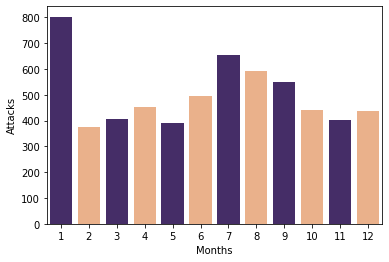

In [101]:
plot_months = sns.countplot(x = attacks_df['Months'],
                 palette = ['#432371',"#FAAE7B"])
plot_months.set(xlabel = 'Months', 
       ylabel='Attacks');


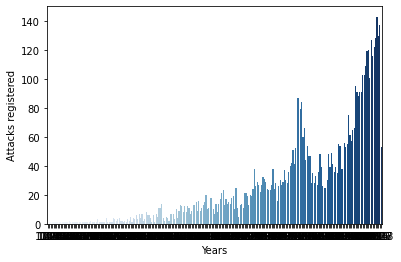

In [104]:
plot_years = sns.countplot(x = attacks_df.Years,
                           palette = 'Blues');
plot_years.set(xlabel = 'Years', 
       ylabel='Attacks registered');

## Location

In [106]:
attacks_df.Location.describe()

count                                 5522
unique                                3942
top       New Smyrna Beach, Volusia County
freq                                   162
Name: Location, dtype: object

In [107]:
attacks_df.Location.value_counts(dropna=False)

NaN                                 477
New Smyrna Beach, Volusia County    162
Daytona Beach, Volusia County        30
Ponce Inlet, Volusia County          20
Melbourne Beach, Brevard County      18
                                   ... 
Gleneden Beach, Lincoln County        1
Belfast (now Port Fairy)              1
Off Cebu                              1
Castellon de la Plana                 1
Cowell                                1
Name: Location, Length: 3943, dtype: int64

In [108]:
# There are so many unique values, it's necessary to group them, or use the Country instead the Location
new_Location = attacks_df.Location.str.extract(r'(?P<Beach>.+),(?P<County>.+)')[['County', 'Beach']]
attacks_df.Location = new_Location.County

In [109]:
# Location column is not useful at the visual inspection level
# With 807 categories no graphic conclusion can be drawn instead you use a world heatmap
attacks_df.Location.describe()

count                2716
unique                807
top        Volusia County
freq                  293
Name: Location, dtype: object

In [113]:
# The locations with a higher shark attacks register are: 
attacks_df.Location.value_counts(dropna=False).head(11)

NaN                    3283
 Volusia County         293
 Palm Beach County       98
 Brevard County          85
 Maui                    74
 O'ahu                   52
 Durban                  45
 Monroe County           42
 Sydney                  40
 Los Angeles County      39
 Horry County            36
Name: Location, dtype: int64

In [59]:
attacks_df.Country.describe()

count     5957
unique     198
top        USA
freq      2178
Name: Country, dtype: object

In [60]:
attacks_df.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [61]:
attacks_df['Country'].replace(('nan', 'NaN'), inplace = True)
attacks_df['Country'].fillna('NaN')
attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)\s/.*', r'\1')
attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)?', r'\1')
attacks_df['Country'] = attacks_df.Country.str.replace(r'^Between\s(.*)\s.*', r'\1')
attacks_df['Country'] = attacks_df.Country.str.replace(r'.*British*.', 'UNITED KINGDOM')
attacks_df['Country'] = attacks_df.Country.str.replace(r'.*BRITISH*.', 'UNITED KINGDOM')
attacks_df['Country'].replace(('PALESTINIAN TERRITORIES', 'PALESTINA'), inplace = True)
attacks_df['Country'] = attacks_df.Country.str.replace(r'.*TURKS*.', 'TURKEY')
attacks_df['Country'].replace(('UNITED ARAB EMIRATES (UAE)', 'UNITED ARAB EMIRATES'), inplace = True)
attacks_df['Country'].replace(('GULF OF ADEN', 'SOMALIA'), inplace = True)
attacks_df['Country'].replace(('ST. MAARTIN', 'NETHERLANDS'), inplace = True)
attacks_df['Country'].replace(('CEYLON (SRI LANKA)', 'SRI LANKA'), inplace = True)


<ipython-input-61-3ada7e76a166>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)\s/.*', r'\1')
<ipython-input-61-3ada7e76a166>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)?', r'\1')
<ipython-input-61-3ada7e76a166>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'^Between\s(.*)\s.*', r'\1')
<ipython-input-61-3ada7e76a166>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'.*British*.', 'UNITED KINGDOM')
<ipython-input-61-3ada7e76a166>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country']

In [62]:
attacks_df.Country.describe()

count     5957
unique     187
top        USA
freq      2185
Name: Country, dtype: object

> Top model 2: __Space-time statistics__

>_Procedure_
>- Cleaning Date series (we start with 5433 different values, and decide to reduce it to the years in order to have a view of the general tendence, getting 254 unique values)
>- Cleaning Location series 
 
>_Conclusions_


In [ ]:
'''
2. Toy model 2: space-time statistics
   1. Focus on date and location columns
   2. Choose a cleaning strategy
   3. Extract statistics and draw at least two graphs that are insightful
   4. Report your procedure and conclusions with a paragraph
'''

# Free project

## Cleaning

In [ ]:
'''

3. Free project
   1. With no column restrictions, choose an interesting hypothesis/model
   2. Clean the data accordingly
      - You can use: `df.describe()`, `df["column"]`, etc.
      - Use at least 5 data cleaning techniques inside a file named `clean.ipynb`
      - Null values, columns drop, duplicated data, string manipulation,
      apply fn, categorize, regex, etc.  
   3. Extract statistics and draw at least 3-4 graphs that are insightful
   4. Show data that validates the conclusions based on your hypotesis in a file
   named `analysis.ipynb`
   5. Build a compelling story-telling around your findings.
   Think of your stakeholders and convince them with your conclusions!
   (Some slides with few text and pretty plots are normally useful)

'''

In [ ]:
attacks_df.Type.value_counts(dropna=False)

In [ ]:
attacks_df['Type'] = attacks_df['Type'].astype(str)
attacks_df['Type'].replace(('', 'NaN'), inplace = True)
attacks_df['Type'].replace(('Boat', 'Boating'), inplace = True)
attacks_df['Type'].replace(('nan', 'NaN'), inplace = True)
attacks_df['Type'].replace(('Boatomg', 'Boating'), inplace = True)
attacks_df['Type'].replace(('Questionable', 'Invalid'), inplace = True)

attacks_df['Type'].fillna('NaN') 

In [ ]:
attacks_df['Type'].describe() 

In [ ]:
attacks_df.Activity.value_counts(dropna=False)

In [ ]:
attacks_df['Activity'] = attacks_df['Activity'].astype(str)
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*diving*', 'Diving')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Diving.*', 'Diving')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*oogie.*', 'Body boarding')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Walking*', 'Standing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*wimming.*', 'Swimming')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*bathing.*', 'Swimming')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Bathing.*', 'Swimming')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*fish.*', 'Sailing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Fish.*', 'Sailing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*sail.*', 'Sailing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*surf.*', 'Surfing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Treading.*', 'Standing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Surf skiing.*', 'Surf-skiing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'\w{13}', 'NaN')
attacks_df['Activity'].fillna('NaN') 

In [ ]:
attacks_df.Activity.value_counts(dropna=False).head(15)

In [ ]:
attacks_df.Injury.value_counts(dropna=False).head(30)

In [ ]:
attacks_df['Injury'] = attacks_df['Injury'].astype(str)

attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*FATAL.*', 'FATAL')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*Fatal.*', 'FATAL')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*bitten.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*bitten.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*No injury.*', 'No injury')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*acerat.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*njur.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*evere.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*wound.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*brasio.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^\D{13}$', 'NaN')

attacks_df['Injury'].replace(('No details','NaN'), inplace = True)


attacks_df['Injury'].fillna('NaN') 

In [72]:
pd.set_option('display.max_columns',24)
pd.set_option('display.max_columns',24)
attacks_df.drop(["Case Number", "Species"], axis=1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Months
attacks_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,2018.06.25,2018-06-25,2018.0,Boating,USA,California,San Diego County,Paddling,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,6
2,2018.06.18,2018-06-18,2018.0,Unprovoked,USA,Georgia,Glynn County,Standing,Adyson McNeely,F,11.0,Minor injury to left thigh,...,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,6
3,2018.06.09,2018-06-09,2018.0,Invalid,USA,Hawaii,Oahu,Surfing,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,...,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,6
4,2018.06.08,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,NaN,Surfing,male,M,48.0,Minor injury to lower leg,...,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,6
5,2018.06.04,2018-06-04,2018.0,Provoked,MEXICO,Colima,NaN,Free diving,Gustavo Ramos,M,48.0,Lacerations to leg & hand shark PROVOKED INCIDENT,...,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,1738.04.06.R,1738-04-06,1738.0,Unprovoked,ITALY,Sicily,NaN,Swimming,male,M,14.0,FATAL,...,NaN,NaN,"C. Moore, GSAF",1738.04.06.R-Messina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1738.04.06.R,1738.04.06.R,147.0,NaN,NaN,4
6158,1733.00.00,1733-01-01,1733.0,Invalid,ICELAND,Bardestrand,NaN,NaN,NaN,NaN,14.0,"Partial hominid remains recovered from shark, ...",...,NaN,Shark involvement prior to death unconfirmed,E. Olafsen,1733.00.00-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1733.00.00,1733.00.00,146.0,NaN,NaN,1
6159,1723.00.00,1723-01-01,1723.0,Unprovoked,ROATAN,NaN,NaN,NaN,Philip Ashton,M,14.0,Struck on thigh,...,NaN,NaN,"C.Moore, GSAF",1730.00.00-Ashton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1723.00.00,1723.00.00,145.0,NaN,NaN,1


In [82]:
attacks_df.columns = attacks_df.columns.str.lower().str.strip()

In [83]:
attacks_df.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,...,time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23,months
attacks_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,2018.06.25,2018-06-25,2018.0,Boating,USA,California,San Diego County,Paddling,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,6
2,2018.06.18,2018-06-18,2018.0,Unprovoked,USA,Georgia,Glynn County,Standing,Adyson McNeely,F,11.0,Minor injury to left thigh,...,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,6
3,2018.06.09,2018-06-09,2018.0,Invalid,USA,Hawaii,Oahu,Surfing,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,...,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,6
4,2018.06.08,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,NaN,Surfing,male,M,48.0,Minor injury to lower leg,...,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,6
5,2018.06.04,2018-06-04,2018.0,Provoked,MEXICO,Colima,NaN,Free diving,Gustavo Ramos,M,48.0,Lacerations to leg & hand shark PROVOKED INCIDENT,...,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,6
